# PCA Intro

Given $ X \in R^{n \times p}$, where we have $n$ datapoints and $p$ features, we would like to consider the first $k$ directions in the high-dimensional feature space where most data lie on.

$PC_1$ being the most important direction (captures the maximum variance in the data)

Each $PC \in R^p$ is a linear combination of the original $p$ features, scaled to unit norm

i.e. if $PC_1 = (0.9, 0.1, 0)$, this means first feature (say x-axis) is most important, data are spreaded along x-axis, but don't vary along y and z-axis)

Two ways to do PCA:  

### Eigendecomposition
First is to obtain the eigen decomposition of the normalized gram matrix $G \in R^{p \times p}$

$$
G = \frac{1}{n-1}X^TX 
$$

$$
Gv_i = \lambda_i v_i
$$

Each $v_i \in R^{p}$ is a PC, or a direction in the feature space.

We obtain $V = (v_1 \dots v_p) \in R^{p \times p}$ the eigenvector matrix, 
and $\lambda = \text{diag}( \lambda_1 \dots \lambda_p)$ the eigenvalue matrix

$$
X^TXV = \lambda V
$$

Second way is to do SVD

### SVD

$$
X = USV^T
$$

Where $U \in R^{n \times p}$, and $S, V \in R^{p \times p}$.  
Here $ S = \text{diag}( s_1 \dots s_p)$ is such that each $s_i = \sqrt{\lambda_i}$, 
and $V$ is still the PC matrix

We can project X onto PC and obtain $X^{'} = XV \; \in R^{n \times p}$

Note by orthogonality of $V$, we have 

$$
XV = USV^TV = US
$$

So the $j$ th col of $US$ gives us the projected $X$, or the coordinates on the $j$ th PC, or $V_j$

We can also project $X$ onto only the first $k$ columns of $V$, and obtain an $n \times k$ matrix

$$
X^{'}_k = XV[:k] = USV^T(v_1 \dots v_k) = (U_1 s_1 \dots U_k s_k)
$$

or the first $k$ columns of $U$, each multiplied by the singluar value $s_i$

We can reconstruct $X$ from $X^{'}_k \in R^{n \times k}$ by projecting it on 
$V_k = (v_1 \dots v_k)^T \in R^{k \times p}$

$$
\hat{X} = X^{'}_k (v_1 \dots v_k)^T \in R^{n \times p}
$$

and when $k = p$, we obtain the original $X$

### Terminologies

- $V$ is the principal components, with $i$-th col being $PC_i$

- $US = \sqrt{\lambda_i}U_i$ are refered to as the projections / principal coordinates / scores
- $VS = \sqrt{\lambda_i}V_i$ are the factor loadings, with each column being $PC_i$ weighted by $\sqrt{\lambda_i}$



### An Trivial Example

Consider trivial example in 2-dim, when we have data lying along the line $ y = -x$ plus some noise

We have $X \in R^{n \times 2}$, with two features given by direction $(1, 0)$ and $(0, 1)$. 

One would expect PC1 to give the direction $(1, -1)$. 

Note the PC vector needs to have unit norm, giving roughly $(-0.7, -0.7)$

First principal component: [ 0.6978726  -0.71622192]
Second principal component: [-0.71622192 -0.6978726 ]


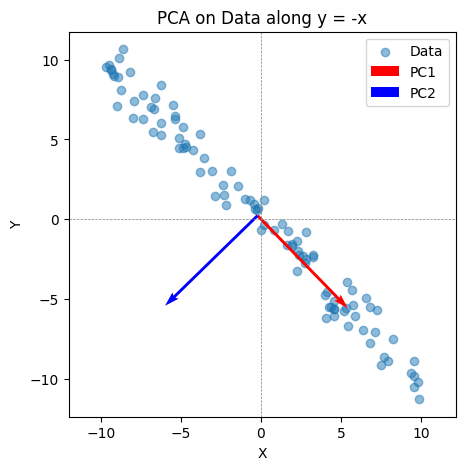

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Simulate data along the line y = -x
n = 100  # Number of points
x = np.random.uniform(-10, 10, n)  # Random x values
y = -x + np.random.normal(0, 1, n)  # y = -x + noise

X = np.column_stack((x, y))  # Shape (n,2)

# Step 2: Perform PCA
pca = PCA(n_components=2)
pca.fit(X)

# Principal components
pc1 = pca.components_[0]  # First principal component
pc2 = pca.components_[1]  # Second principal component

print("First principal component:", pc1)
print("Second principal component:", pc2)

# Mean of data
mean = np.mean(X, axis=0)

# Step 3: Visualize the data and principal components
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], label="Data", alpha=0.5)

# Plot PC1 and PC2
plt.quiver(mean[0], mean[1], pc1[0], pc1[1], 
            color='r', scale=3, label="PC1")
plt.quiver(mean[0], mean[1], pc2[0], pc2[1], 
            color='b', scale=3, label="PC2")

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("PCA on Data along y = -x")
plt.legend()
plt.axis("equal")
plt.show()